In [1]:
#Install required libraries 

#(adjusted code from pip to pip3) from https://github.com/peckham-daz/24-intro-to-data-science/blob/main/2025_01/session05/YouTube_API.md
!pip3 install google-api-python-client pandas matplotlib textblob



In [1]:
#import for acessing YouTube API 
from googleapiclient.discovery import build

#install for data analysis
import pandas as pd

#for data visualisations
import matplotlib.pyplot as plt

#for processing textual data
from textblob import TextBlob

In [ ]:
#IMPORTING more DEPENDENCIES for sentiment analysi: https://www.geeksforgeeks.org/sentiment-analysis-of-youtube-comments/ 
#adjusting code to pip3
!pip3 install emoji
!pip3 install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
#install python-dotenv package to hide api keys
!pip3 install python-dotenv

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import os
from dotenv import load_dotenv

def configure():
    load_dotenv()

In [ ]:
#authenticate and connect to YouTube API

youtube = build("youtube", "v3", developerKey=os.getenv('api_key'))


In [ ]:
#get api key
load_dotenv()
youtube.api_key = os.getenv("YOUTUBE_API_KEY")

In [6]:
!pip3 install google-api-python-client pandas matplotlib textblob

In [7]:
request = youtube.videos().list(
    part="snippet,statistics",
    chart="mostPopular",
    regionCode="GB",
    maxResults=10
)
response = request.execute()

In [8]:
video_data = []

for item in response["items"]:
    video_data.append({
        "Title": item["snippet"]["title"],
        "Views": int(item["statistics"]["viewCount"]),
        "Likes": int(item["statistics"].get("likeCount", 0)),
        "Comments": int(item["statistics"].get("commentCount", 0))
    })

video_df = pd.DataFrame(video_data)
video_df.head()

,Title,Views,Likes,Comments
0,SIDEMEN ROAD TRIP BUT EVERY HOUR THE CAR GETS ...,3802617,139148,4749
1,Unleash Your Inner Clash,961438,37683,2339
2,Squid Game In Real Life: Beta Squad Edition,4411311,228964,16198
3,Kalogeras Sisters BLIND DATE on The Button! | Cut,1859552,83553,2702
4,Rashford scores twice as Aston Villa beat Pres...,188436,1403,163


In [10]:
video_id = response["items"][0]["id"]  # Get first video's ID

comment_request = youtube.commentThreads().list(
    part="snippet",
    videoId=video_id,
    maxResults=20
)
comment_response = comment_request.execute()

In [11]:
from googleapiclient.discovery import build
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [12]:
comments = []
sentiments = []

for item in comment_response["items"]:
    comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
    sentiment = TextBlob(comment).sentiment.polarity  # Analyzes sentiment
    comments.append(comment)
    sentiments.append(sentiment)

comment_df = pd.DataFrame({"Comment": comments, "Sentiment": sentiments})
comment_df.head()

,Comment,Sentiment
0,"Anyone know which song this is? <a href=""https...",0.00
1,Think Simon team and josh team should have to ...,0.00
2,"Josh im about to dislike this video, and thats...",0.25
3,"<a href=""https://www.youtube.com/watch?v=xgwaz...",0.05
4,Im dropping a comment everytime he stalls,0.00


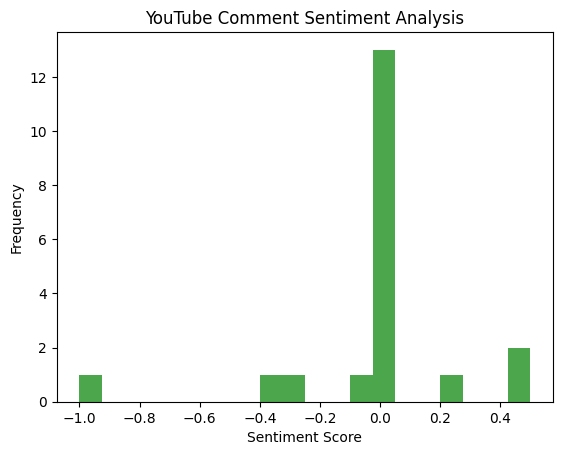

In [13]:
plt.hist(comment_df["Sentiment"], bins=20, color='green', alpha=0.7)
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("YouTube Comment Sentiment Analysis")
plt.show()

In [14]:
video_id = response["items"][0]["id"]  # Get first video's ID

comment_request = youtube.commentThreads().list(
    part="snippet",
    videoId=video_id,
    #increase number of comments analysed to 100
    maxResults=100
)
comment_response = comment_request.execute()

In [15]:
comments = []
sentiments = []

for item in comment_response["items"]:
    comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
    sentiment = TextBlob(comment).sentiment.polarity  # Analyzes sentiment
    comments.append(comment)
    sentiments.append(sentiment)

comment_df = pd.DataFrame({"Comment": comments, "Sentiment": sentiments})
comment_df.head()

,Comment,Sentiment
0,"As a professional driver this is my dream, I&#...",0.10
1,"Anyone know which song this is? <a href=""https...",0.00
2,Think Simon team and josh team should have to ...,0.00
3,"Josh im about to dislike this video, and thats...",0.25
4,"<a href=""https://www.youtube.com/watch?v=xgwaz...",0.05


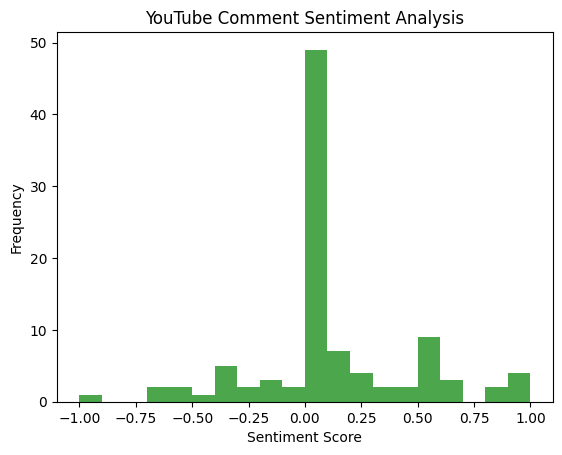

In [16]:
plt.hist(comment_df["Sentiment"], bins=20, color='green', alpha=0.7)
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("YouTube Comment Sentiment Analysis")
plt.show()

In [17]:
#from : https://www.geeksforgeeks.org/sentiment-analysis-of-youtube-comments/ 

def sentiment_scores(comment, polarity):

    # Creating a SentimentIntensityAnalyzer object.
    sentiment_object = SentimentIntensityAnalyzer()

    sentiment_dict = sentiment_object.polarity_scores(comment)
    polarity.append(sentiment_dict['compound'])

    return polarity


polarity = []
positive_comments = []
negative_comments = []
neutral_comments = []

comment_df = pd.DataFrame({"Comment": comments, "Sentiment": sentiments})
print("Analysing Comments...")
for index, items in enumerate(comments):
    polarity = sentiment_scores(items, polarity)

    if polarity[-1] > 0.05:
        positive_comments.append(items)
    elif polarity[-1] < -0.05:
        negative_comments.append(items)
    else:
        neutral_comments.append(items)

# Print polarity
polarity[:5]

Analysing Comments...


[0.25, 0.0, -0.5267, -0.3818, 0.4404]

In [18]:
avg_polarity = sum(polarity)/len(polarity)
print("Average Polarity:", avg_polarity)
if avg_polarity > 0.05:
    print("The Video has got a Positive response")
elif avg_polarity < -0.05:
    print("The Video has got a Negative response")
else:
    print("The Video has got a Neutral response")

print("The comment with most positive sentiment:", comments[polarity.index(max(
    polarity))], "with score", max(polarity), "and length", len(comments[polarity.index(max(polarity))]))
print("The comment with most negative sentiment:", comments[polarity.index(min(
    polarity))], "with score", min(polarity), "and length", len(comments[polarity.index(min(polarity))]))

Average Polarity: 0.19277000000000008
The Video has got a Positive response
The comment with most positive sentiment: <a href="https://www.youtube.com/watch?v=xgwaz7Z9FIU&amp;t=2189">36:29</a> I think I enjoyed it more having the copyright free music over than I would have the original music 😂😂😂 with score 0.9485 and length 178
The comment with most negative sentiment: Ethan really does have to ruin every video he’s in doesn’t he - you’re a grown man, it’s just pathetic with score -0.8176 and length 102


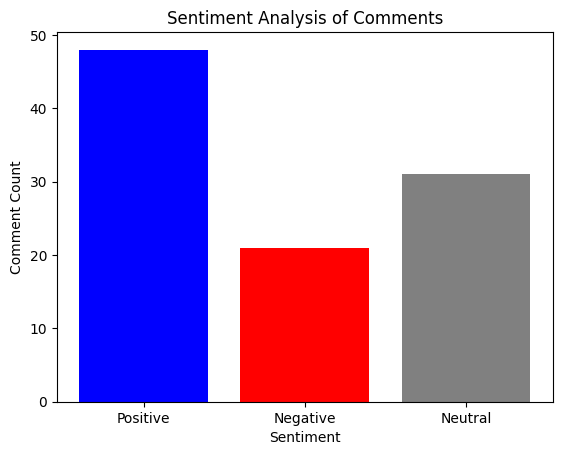

In [20]:
positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

# labels and data for Bar chart
labels = ['Positive', 'Negative', 'Neutral']
comment_counts = [positive_count, negative_count, neutral_count]

# Creating bar chart
plt.bar(labels, comment_counts, color=['blue', 'red', 'grey'])

# Adding labels and title to the plot
plt.xlabel('Sentiment')
plt.ylabel('Comment Count')
plt.title('Sentiment Analysis of Comments')

# Displaying the chart
plt.show()

In [37]:
!pip3 install wordcloud


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [21]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

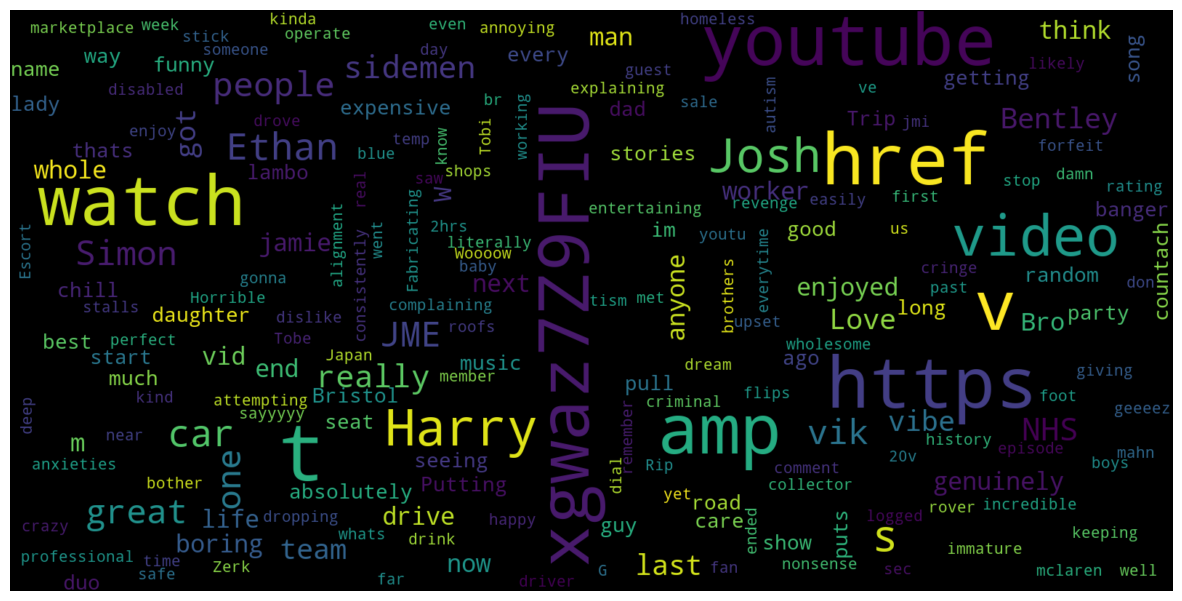

In [22]:
#create wordcloud
consolidated = ' '.join(word for word in comment_df['Comment'].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, random_state=21, 
                      max_font_size=110, collocations=False) 

plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

In [42]:
comment_df.to_csv('youtube_comments.tsv')
comment_df = pd.DataFrame({"Comment": comments, "Sentiment": sentiments})
comment_df.head()

,Comment,Sentiment
0,"As a professional driver this is my dream, I&#...",0.10
1,"Anyone know which song this is? <a href=""https...",0.00
2,Think Simon team and josh team should have to ...,0.00
3,"Josh im about to dislike this video, and thats...",0.25
4,"<a href=""https://www.youtube.com/watch?v=xgwaz...",0.05


In [30]:
#https://github.com/peckham-daz/24-nlp-for-creatives/blob/main/2025_02/session_2/mb-classification-with-lda-features.ipynb

# Basic libraries
import nltk
import pandas as pd

# NLTK utils
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Bag of words and LDA 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# For classification 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
#download packages
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/toniayon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/toniayon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/toniayon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [33]:
#parts of speech tagging Function originally from: https://www.programcreek.com/python/?CodeExample=get%20wordnet%20pos
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [59]:
#save comments to csv file
comment_df.to_csv('youtube_comments_3103.csv')
comment_df = pd.DataFrame({"Comment": comments, "Sentiment": sentiments})
comment_df.head()


,Comment,Sentiment
0,"As a professional driver this is my dream, I&#...",0.10
1,"Anyone know which song this is? <a href=""https...",0.00
2,Think Simon team and josh team should have to ...,0.00
3,"Josh im about to dislike this video, and thats...",0.25
4,"<a href=""https://www.youtube.com/watch?v=xgwaz...",0.05


In [64]:
df = pd.read_csv('youtube_comments_3103.csv')
print (df.head())

   Unnamed: 0                                            Comment  Sentiment
0           0  As a professional driver this is my dream, I&#...       0.10
1           1  Anyone know which song this is? <a href="https...       0.00
2           2  Think Simon team and josh team should have to ...       0.00
3           3  Josh im about to dislike this video, and thats...       0.25
4           4  <a href="https://www.youtube.com/watch?v=xgwaz...       0.05


In [65]:
#run lemmatizer on comments
lemmatizer = WordNetLemmatizer()
for index, row in df.iterrows():
    comment = str(row['Comment'])
    lemmitized_comment = " ".join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in comment.split()])
    df.loc[index, 'Comment'] = lemmitized_comment
df

,Unnamed: 0,Comment,Sentiment
0,0,"As a professional driver this be my dream, I&#...",0.10
1,1,"Anyone know which song this is? <a href=""https...",0.00
2,2,Think Simon team and josh team should have to ...,0.00
3,3,"Josh im about to dislike this video, and thats...",0.25
4,4,"<a href=""https://www.youtube.com/watch?v=xgwaz...",0.05
...,...,...,...
95,95,"The brizzle accent on YouTube ❤ <a href=""https...",0.00
96,96,"<a href=""https://www.youtube.com/watch?v=xgwaz...",0.50
97,97,Where be jj,0.00
98,98,"dnb <a href=""UCkszU2WH9gy1mb0dV-11UJg/m8MfY4jb...",0.00


In [66]:
#conver classes into integer number
le = LabelEncoder()
df['feat_to_classify'] = df['Comment'].str.strip().str[0]
df['class_label'] = le.fit_transform(df['feat_to_classify'])
df

,Unnamed: 0,Comment,Sentiment,feat_to_classify,class_label
0,0,"As a professional driver this be my dream, I&#...",0.10,A,2
1,1,"Anyone know which song this is? <a href=""https...",0.00,A,2
2,2,Think Simon team and josh team should have to ...,0.00,T,17
3,3,"Josh im about to dislike this video, and thats...",0.25,J,10
4,4,"<a href=""https://www.youtube.com/watch?v=xgwaz...",0.05,<,1
...,...,...,...,...,...
95,95,"The brizzle accent on YouTube ❤ <a href=""https...",0.00,T,17
96,96,"<a href=""https://www.youtube.com/watch?v=xgwaz...",0.50,<,1
97,97,Where be jj,0.00,W,19
98,98,"dnb <a href=""UCkszU2WH9gy1mb0dV-11UJg/m8MfY4jb...",0.00,d,22


In [ ]:
#extract comments, class labels and associated names of classes into lists
comments = df["Comment"].values.tolist()
class_labels = df["class_label"].values.tolist()
class_names = list(le.classes_)

In [68]:
# fit bage of words to dataset so bag of words feature vectors are the same legnth in both test and training sets
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,1))
bag_of_words = vectorizer.fit_transform(comments)
vocab = vectorizer.get_feature_names_out()
print(f'Our bag of words for the whole dataset is a matrix of the shape and size {bag_of_words.shape}')

Our bag of words for the whole dataset is a matrix of the shape and size (100, 398)


In [ ]:
#split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(comments, class_labels, test_size=0.3, random_state=41)

In [70]:
#redo bag of words on test and train
X_train_bow = vectorizer.transform(X_train)
X_train_bow

<70x398 sparse matrix of type '<class 'numpy.int64'>'
	with 600 stored elements in Compressed Sparse Row format>

In [71]:
#calculate topics
num_topics = 10
pd.options.display.max_columns=num_topics #Make sure we display them all
labels = ['topic{}'.format(i) for i in range(num_topics)]
lda = LatentDirichletAllocation(n_components=num_topics,random_state=123, learning_method='batch')
lda_train_topics = lda.fit_transform(X_train_bow)

In [72]:
#look at topics
topic_weights = pd.DataFrame(lda.components_.T, index=vocab, columns=labels)
topic_weights.sample(20)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
absolute,0.1,0.100000,0.10000,0.100000,0.100000,0.1,0.100000,1.100000,0.100000,0.100000
penalty,0.1,0.100000,0.10000,0.100000,0.100000,1.1,0.100000,0.100000,0.100000,0.100000
far,0.1,0.100000,0.10000,1.100000,0.100000,0.1,0.100000,0.100000,0.100000,0.100000
flip,0.1,0.100000,0.10000,0.100027,0.100000,0.1,0.100000,0.100000,0.100000,1.099973
37,0.1,0.100000,0.10000,0.100020,1.099980,0.1,0.100000,0.100000,0.100000,0.100000
lil,0.1,0.100000,0.10000,1.100000,0.100000,0.1,0.100000,0.100000,0.100000,0.100000
budget,0.1,1.100000,0.10000,0.100000,0.100000,0.1,0.100000,0.100000,0.100000,0.100000
glad,0.1,0.100000,0.10000,0.100000,0.100000,1.1,0.100000,0.100000,0.100000,0.100000
thats,0.1,1.100002,0.10000,0.100000,0.100000,0.1,0.100000,0.100000,0.100000,1.099998
foot,0.1,0.100000,0.10000,1.100000,0.100000,0.1,0.100000,0.100000,0.100000,0.100000


In [73]:
#train classifier
classifier = MultinomialNB()
classifier.fit(lda_train_topics, y_train)

MultinomialNB()

In [74]:
#prepare test data
X_test_bow = vectorizer.transform(X_test)
X_test_bow

<30x398 sparse matrix of type '<class 'numpy.int64'>'
	with 214 stored elements in Compressed Sparse Row format>

In [75]:
#test classifier
lda_test_topics = lda.transform(X_test_bow)

In [76]:
y_pred = classifier.predict(lda_test_topics)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=None)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.23333333333333334
Classification Report:
              precision    recall  f1-score   support

           1       0.44      1.00      0.61         7
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         0
          21       0.00     

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr